# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install tqdm

from tqdm import tqdm
tqdm.pandas()  # Integrasi tqdm dengan pandas

# Load Dataset & EDA

Dataset yang digunakan yakni [Spam Mails](https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data) dari Venkatesh Garnepudi

In [3]:
url = "/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv"
df = pd.read_csv(url)

# Menampilkan dataframe sebagai tabel
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
# Menghitung dan menampilkan nilai NaN
missing_data = df.isna().sum()  # Menampilkan jumlah NaN per kolom
print(missing_data)

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [5]:
# Hitung jumlah label 
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

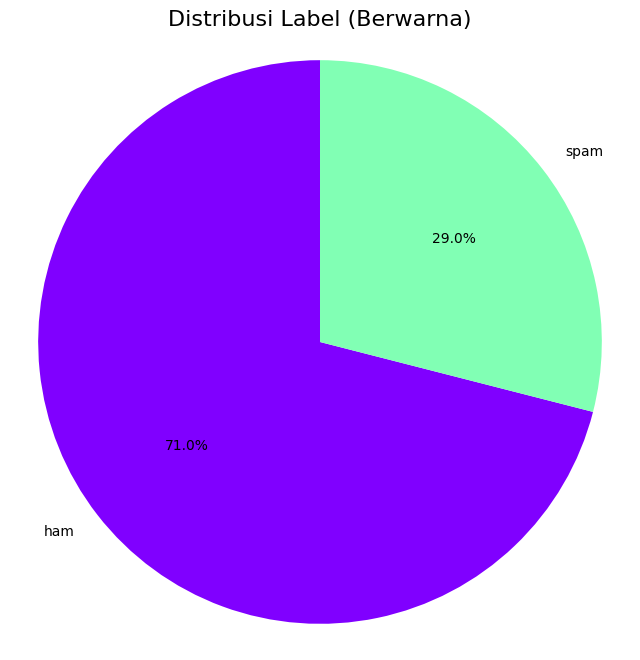

In [6]:
# Menghitung jumlah label
label_counts = df['label'].value_counts()

# Membuat daftar warna yang berbeda
colors = plt.cm.rainbow([i/float(len(label_counts)) for i in range(len(label_counts))])

# Membuat grafik lingkaran
plt.figure(figsize=(8, 8))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Menambahkan judul
plt.title('Distribusi Label (Berwarna)', fontsize=16)

# Menampilkan grafik
plt.axis('equal')  # Memastikan lingkaran tetap berbentuk lingkaran
plt.show()

# NLTK

Natural Languange ToolKit (NLTK) yakni "sebuah platform berbasis Python yang dikembangkan untuk memproses data text."

[Paper](https://sistemcerdas.mipa.ugm.ac.id/wp-content/uploads/sites/1297/2020/06/Pengenalan-NLTK-Bagian-1.pdf)

[Documentation](https://www.nltk.org/install.html)

In [7]:
!pip install nltk

In [8]:
import string
import nltk
import re

print(nltk.data.path)

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [9]:
# Unduh resource yang diperlukan
nltk.download('wordnet')  # Untuk stemming
nltk.download('omw-1.4')  # Untuk data bahasa tambahan (opsional)
nltk.download('punkt')     # Untuk tokenization
nltk.download('stopwords') # Untuk stopwords

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Pre-Processing

> Case Folding

In [10]:
import pandas as pd
import re # modul re adalah regular expression 

def preprocess_text(text):
    # Menghapus URL
    text = re.sub(r'https\S+', ' ', text, flags=re.IGNORECASE)
    
    # Mengubah teks jadi lower case
    text = text.lower()
    
    # Menghapus mention
    text = re.sub(r'@\S+', ' ', text, flags=re.IGNORECASE)
    
    # Menghapus hashtag
    text = re.sub(r'#\S+', ' ', text, flags=re.IGNORECASE)
    
    # Menghapus next karakter
    text = re.sub(r"'\w+", ' ', text)
    
    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Menghapus extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Menghapus angka
    text = re.sub(r'\d+', '', text)      
    
    return text

# Terapkan fungsi preprocess_text ke kolom 'text'
df['text_Clean'] = df['text'].progress_apply(preprocess_text)

100%|██████████| 5171/5171 [00:00<00:00, 5274.86it/s]


In [11]:
df

,Unnamed: 0,label,text,label_num,text_Clean
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached fil...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put the on the ft the transport volum...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject and following noms hpl can t take t...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie as ...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheets for august acti...


> Stop Word

In [12]:
# Import pustaka nltk dari modul corpus
import nltk.corpus

# download stopwords
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Hapus kata - kata umum
stop = stopwords.words('english')
df['text_StopWord'] = df['text_Clean'].progress_apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

100%|██████████| 5171/5171 [00:01<00:00, 3248.23it/s]


In [14]:
df

,Unnamed: 0,label,text,label_num,text_Clean,text_StopWord
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow...,subject enron methanol meter follow note gave ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached fil...,subject hpl nom january see attached file hpln...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...,subject indian springs deal book teco pvr reve...
...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put the on the ft the transport volum...,subject put ft transport volumes decreased con...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject and following noms hpl can t take t...,subject following noms hpl take extra mmcf wee...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination julie men...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheets for august acti...,subject industrial worksheets august activity ...


> Tokenize

In [15]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [16]:
# Melakukan tokenize menggunakan Regexp
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')
df['text_Tokenize']=df['text_StopWord'].progress_apply(regexp.tokenize)

100%|██████████| 5171/5171 [00:00<00:00, 26194.64it/s]


In [17]:
df

,Unnamed: 0,label,text,label_num,text_Clean,text_StopWord,text_Tokenize
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow...,subject enron methanol meter follow note gave ...,"[subject, enron, methanol, meter, follow, note..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached fil...,subject hpl nom january see attached file hpln...,"[subject, hpl, nom, january, see, attached, fi..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...,subject neon retreat ho ho ho around wonderful...,"[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...,subject photoshop windows office cheap main tr...,"[subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...,subject indian springs deal book teco pvr reve...,"[subject, indian, springs, deal, book, teco, p..."
...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put the on the ft the transport volum...,subject put ft transport volumes decreased con...,"[subject, put, ft, transport, volumes, decreas..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject and following noms hpl can t take t...,subject following noms hpl take extra mmcf wee...,"[subject, following, noms, hpl, take, extra, m..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination julie men...,"[subject, calpine, daily, gas, nomination, jul..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheets for august acti...,subject industrial worksheets august activity ...,"[subject, industrial, worksheets, august, acti..."


> Sastrawi (Stemming)

In [18]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:0000:01


In [19]:
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer
from tqdm import tqdm

# Inisialisasi SnowballStemmer untuk bahasa Inggris
stemmer = SnowballStemmer("english")

# Unduh resource NLTK yang diperlukan (jika belum diunduh)
nltk.download('punkt')

# Fungsi untuk stemming daftar token menggunakan SnowballStemmer
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Terapkan stemming ke setiap daftar token di 'text_Tokenize'
df['text_Stem'] = df['text_Tokenize'].progress_apply(stem_tokens)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 5171/5171 [00:09<00:00, 556.28it/s]


In [20]:
df

,Unnamed: 0,label,text,label_num,text_Clean,text_StopWord,text_Tokenize,text_Stem
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow...,subject enron methanol meter follow note gave ...,"[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached fil...,subject hpl nom january see attached file hpln...,"[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, januari, see, attach, file..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...,subject neon retreat ho ho ho around wonderful...,"[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...,subject photoshop windows office cheap main tr...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...,subject indian springs deal book teco pvr reve...,"[subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv..."
...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put the on the ft the transport volum...,subject put ft transport volumes decreased con...,"[subject, put, ft, transport, volumes, decreas...","[subject, put, ft, transport, volum, decreas, ..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject and following noms hpl can t take t...,subject following noms hpl take extra mmcf wee...,"[subject, following, noms, hpl, take, extra, m...","[subject, follow, nom, hpl, take, extra, mmcf,..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination julie men...,"[subject, calpine, daily, gas, nomination, jul...","[subject, calpin, daili, gas, nomin, juli, men..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheets for august acti...,subject industrial worksheets august activity ...,"[subject, industrial, worksheets, august, acti...","[subject, industri, worksheet, august, activ, ..."


> String Text

In [21]:
# Jika ingin menggabungkan token yang sudah di-stem
df['text_String'] = df['text_Stem'].progress_apply(lambda x: ' '.join(x))

100%|██████████| 5171/5171 [00:00<00:00, 168073.79it/s]


In [22]:
df

,Unnamed: 0,label,text,label_num,text_Clean,text_StopWord,text_Tokenize,text_Stem,text_String
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow...,subject enron methanol meter follow note gave ...,"[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note...",subject enron methanol meter follow note gave ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached fil...,subject hpl nom january see attached file hpln...,"[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, januari, see, attach, file...",subject hpl nom januari see attach file hplnol...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...,subject neon retreat ho ho ho around wonderful...,"[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...",subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...,subject photoshop windows office cheap main tr...,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai...",subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...,subject indian springs deal book teco pvr reve...,"[subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv...",subject indian spring deal book teco pvr reven...
...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put the on the ft the transport volum...,subject put ft transport volumes decreased con...,"[subject, put, ft, transport, volumes, decreas...","[subject, put, ft, transport, volum, decreas, ...",subject put ft transport volum decreas contrac...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject and following noms hpl can t take t...,subject following noms hpl take extra mmcf wee...,"[subject, following, noms, hpl, take, extra, m...","[subject, follow, nom, hpl, take, extra, mmcf,...",subject follow nom hpl take extra mmcf weekend...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie as ...,subject calpine daily gas nomination julie men...,"[subject, calpine, daily, gas, nomination, jul...","[subject, calpin, daili, gas, nomin, juli, men...",subject calpin daili gas nomin juli mention ea...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheets for august acti...,subject industrial worksheets august activity ...,"[subject, industrial, worksheets, august, acti...","[subject, industri, worksheet, august, activ, ...",subject industri worksheet august activ attach...


In [23]:
# Simpan hasilnya
df.to_csv('hasil_Preprocessing.csv',index= False) #simpan hasil text preprocessing ke file csv

In [24]:
# Tampilkan Text String
df['text_String']

0       subject enron methanol meter follow note gave ...
1       subject hpl nom januari see attach file hplnol...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put ft transport volum decreas contrac...
5167    subject follow nom hpl take extra mmcf weekend...
5168    subject calpin daili gas nomin juli mention ea...
5169    subject industri worksheet august activ attach...
5170    subject import onlin bank alert dear valu citi...
Name: text_String, Length: 5171, dtype: object

In [25]:
# Fitur dan Target
X = df['text_String']
y = df['label_num']


In [26]:
X

0       subject enron methanol meter follow note gave ...
1       subject hpl nom januari see attach file hplnol...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put ft transport volum decreas contrac...
5167    subject follow nom hpl take extra mmcf weekend...
5168    subject calpin daili gas nomin juli mention ea...
5169    subject industri worksheet august activ attach...
5170    subject import onlin bank alert dear valu citi...
Name: text_String, Length: 5171, dtype: object

In [27]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

# BOW & TF-IDF

In [28]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import pickle # save

# Inisialisasi CountVectorizer untuk BoW
count_vectorizer = CountVectorizer()

bow =CountVectorizer(ngram_range=(1,1))
bow.fit(X)

CountVectorizer()

In [30]:
len(bow.get_feature_names_out())

37929

In [31]:
bow.get_feature_names_out()

array(['aa', 'aaa', 'aabda', ..., 'zzocb', 'zzso', 'zzsyt'], dtype=object)

In [32]:
X_bow = bow.transform(X).toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
data_bow = pd.DataFrame(X_bow, columns=bow.get_feature_names_out())
data_bow

,aa,aaa,aabda,aabvmmq,aac,aachecar,aaer,aafco,aaiab,aaigrcrb,...,zynv,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
with open('/kaggle/working/hasil_bow.pickle', 'wb') as f:
  pickle.dump(bow, f)

In [35]:
tf_idf =TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

In [36]:
len(tf_idf.get_feature_names_out())

37929

In [37]:
tf_idf.get_feature_names_out()

array(['aa', 'aaa', 'aabda', ..., 'zzocb', 'zzso', 'zzsyt'], dtype=object)

In [38]:
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aaa,aabda,aabvmmq,aac,aachecar,aaer,aafco,aaiab,aaigrcrb,...,zynv,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
with open('/kaggle/working/hasil_tf_idf.pickle', 'wb') as f:
  pickle.dump(tf_idf, f)

# Feature Selection

In [41]:
from sklearn.feature_selection import SelectKBest # feature selection
from sklearn.feature_selection import chi2 # feature selection

In [42]:
X = np.array(data_tf_idf)
y = np.array(y)

In [43]:
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 37929
Reduced feature number: 1000


In [44]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,3.386302
1,0.178377
2,0.104902
3,0.154950
4,0.384626
...,...
37924,0.001573
37925,0.307858
37926,0.287464
37927,0.811560


In [45]:
feature = tf_idf.get_feature_names_out()
data_chi2['text'] = feature
data_chi2

,nilai,text
0,3.386302,aa
1,0.178377,aaa
2,0.104902,aabda
3,0.154950,aabvmmq
4,0.384626,aac
...,...,...
37924,0.001573,zzn
37925,0.307858,zzo
37926,0.287464,zzocb
37927,0.811560,zzso


In [46]:
data_chi2.sort_values(by=['nilai'], ascending=False).head(10)

,nilai,text
10634,117.844129,ect
11259,88.896333,enron
16059,77.037160,hpl
37043,68.879963,xls
16151,65.167206,http
16016,63.968386,hou
8748,57.867103,deal
21635,54.269601,meter
23473,50.617780,nom
13630,44.289640,gas


# Mask Feature

In [47]:
mask = chi2_features.get_support()
mask

array([ True, False, False, ..., False, False, False])

In [48]:
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['aa',
 'abazi',
 'absolut',
 'act',
 'action',
 'activ',
 'acton',
 'actual',
 'addit',
 'adipren',
 'adjust',
 'adob',
 'adult',
 'advantag',
 'advertis',
 'advic',
 'aeor',
 'aep',
 'aerofoam',
 'afford',
 'africa',
 'afternoon',
 'age',
 'agra',
 'agre',
 'agreement',
 'aid',
 'aime',
 'alcohol',
 'alert',
 'ali',
 'align',
 'allergi',
 'alloc',
 'alt',
 'alway',
 'amaz',
 'ambien',
 'ami',
 'angel',
 'anita',
 'anonym',
 'anti',
 'anxieti',
 'ao',
 'aopen',
 'apach',
 'apc',
 'appetit',
 'april',
 'archer',
 'arm',
 'ass',
 'assign',
 'assur',
 'atleast',
 'attach',
 'auction',
 'august',
 'ave',
 'avila',
 'award',
 'away',
 'babe',
 'bad',
 'bank',
 'beaumont',
 'beauti',
 'becom',
 'bed',
 'beliz',
 'bellami',
 'best',
 'better',
 'bgcolor',
 'bigger',
 'biz',
 'blood',
 'blvd',
 'bob',
 'bodi',
 'boost',
 'border',
 'bottl',
 'boulevard',
 'box',
 'boy',
 'br',
 'brand',
 'brbr',
 'brian',
 'brother',
 'browser',
 'btu',
 'bu',
 'bulk',
 'buyback',
 'bye',
 'ca',
 'cabl',
 'ca

In [49]:
tf_idf.vocabulary_

{'subject': 31938,
 'enron': 11259,
 'methanol': 21639,
 'meter': 21635,
 'follow': 12909,
 'note': 23578,
 'gave': 13678,
 'monday': 22240,
 'preliminari': 26452,
 'flow': 12813,
 'data': 8603,
 'provid': 26809,
 'daren': 8551,
 'pleas': 25935,
 'overrid': 24627,
 'pop': 26169,
 'daili': 8467,
 'volum': 35589,
 'present': 26494,
 'zero': 37665,
 'reflect': 27972,
 'activ': 307,
 'obtain': 23874,
 'gas': 13630,
 'control': 7466,
 'chang': 5956,
 'need': 23047,
 'asap': 1976,
 'econom': 10620,
 'purpos': 27004,
 'hpl': 16059,
 'nom': 23473,
 'januari': 17764,
 'see': 29807,
 'attach': 2190,
 'file': 12536,
 'hplnol': 16066,
 'xls': 37043,
 'neon': 23093,
 'retreat': 28336,
 'ho': 15775,
 'around': 1904,
 'wonder': 36559,
 'time': 33273,
 'year': 37292,
 'leader': 19576,
 'know': 18960,
 'extrem': 12003,
 'hectic': 15343,
 'tough': 33580,
 'think': 33084,
 'anyth': 1547,
 'past': 25004,
 'holiday': 15818,
 'life': 19864,
 'go': 14248,
 'week': 36037,
 'decemb': 8807,
 'like': 19898,
 'mi

In [50]:
kbest_feature = {}

for (k,v) in tf_idf.vocabulary_.items():
  if k in selected_feature:
    kbest_feature[k] = v

In [51]:
kbest_feature

{'enron': 11259,
 'methanol': 21639,
 'meter': 21635,
 'follow': 12909,
 'monday': 22240,
 'flow': 12813,
 'daren': 8551,
 'pleas': 25935,
 'pop': 26169,
 'daili': 8467,
 'volum': 35589,
 'zero': 37665,
 'reflect': 27972,
 'activ': 307,
 'gas': 13630,
 'chang': 5956,
 'need': 23047,
 'hpl': 16059,
 'nom': 23473,
 'januari': 17764,
 'see': 29807,
 'attach': 2190,
 'file': 12536,
 'hplnol': 16066,
 'xls': 37043,
 'neon': 23093,
 'know': 18960,
 'past': 25004,
 'life': 19864,
 'decemb': 8807,
 'minut': 21947,
 'schedul': 29532,
 'agre': 668,
 'us': 34762,
 'get': 13909,
 'recharg': 27840,
 'lot': 20310,
 'away': 2426,
 'without': 36451,
 'let': 19755,
 'countri': 7746,
 'www': 36830,
 'hous': 16024,
 'real': 27770,
 'relax': 28082,
 'shop': 30305,
 'store': 31747,
 'ranch': 27617,
 'saturday': 29419,
 'houston': 16034,
 'visit': 35433,
 'home': 15854,
 'email': 11027,
 'major': 20761,
 'great': 14541,
 'happi': 15091,
 'photoshop': 25610,
 'window': 36370,
 'cheap': 6054,
 'smart': 30795,

In [52]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aa,abazi,absolut,act,action,activ,acton,actual,addit,adipren,...,xa,xan,xanaax,xanax,xls,xp,yap,zero,zonedubai,zyban
0,0.0,0.0,0.0,0.0,0.0,0.166196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.191081,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.410362,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.224340,0.0,0.0,0.000000,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
5168,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
5169,0.0,0.0,0.0,0.0,0.0,0.160349,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.066316,0.0,0.0,0.000000,0.0,0.0


In [53]:
with open('/kaggle/working/kbest_feature.pickle', 'wb') as f:
  pickle.dump(selected_feature, f)

# Wordcloud

In [54]:
!pip install wordcloud

In [55]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [56]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2024-09-15 13:03:30--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: 'cloud.jpg'

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.007s  

2024-09-15 13:03:30 (4.67 MB/s) - 'cloud.jpg' saved [34396/34396]



In [57]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

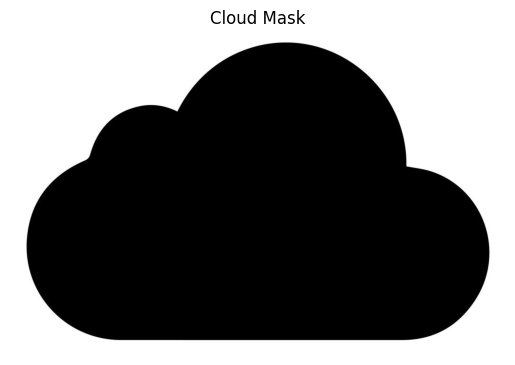

In [58]:
import cv2
import matplotlib.pyplot as plt

# Misalnya, ini adalah masking kamu
cloud_mask = cv2.imread('/kaggle/working/cloud.jpg', cv2.IMREAD_GRAYSCALE)

# Tampilkan masking menggunakan matplotlib
plt.imshow(cloud_mask, cmap='gray')
plt.title('Cloud Mask')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

> Ham (Normal)

In [60]:
df_p=df[df['label_num']==0]

all_words_lem = ' '.join([word for word in df_p['text_String']])

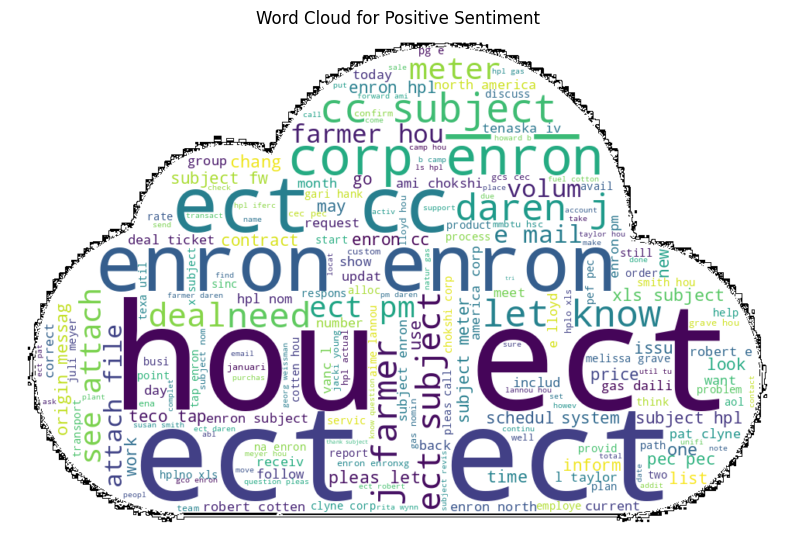

In [61]:
# Buat dan tampilkan word cloud
wordcloud = WordCloud(mask=cloud_mask, background_color='white', contour_width=1, contour_color='black').generate(all_words_lem)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

> Spam

In [62]:
df_p=df[df['label_num']==1]

all_words_lem = ' '.join([word for word in df_p['text_String']])

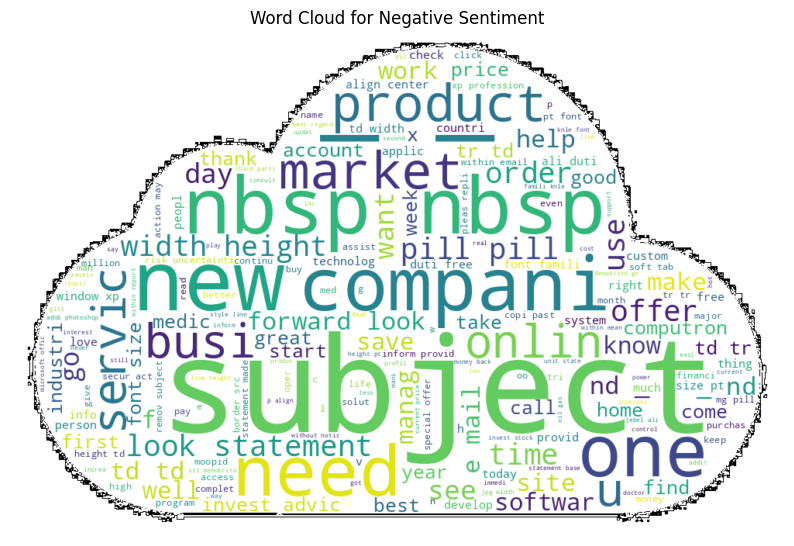

In [64]:
# Buat dan tampilkan word cloud
wordcloud = WordCloud(mask=cloud_mask, background_color='white', contour_width=1, contour_color='black').generate(all_words_lem)

# Tampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off') # Opsional, untuk menyembunyikan sumbu
plt.show()

# SVM

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from joblib import dump, load

# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   

warnings.filterwarnings('ignore')
%matplotlib inline

# Split Data

> 20% Testing
> 80% Train

In [72]:
# Pisahkan data
X_train, X_test, y_train, y_test = train_test_split(data_selected_feature, y, test_size=0.2, random_state=42)

In [73]:
# Inisialisasi model SVM
algorithm = SVC(kernel='linear', random_state=42)

# Melatih model dengan data pelatihan
model = algorithm.fit(X_train, y_train)

# Menyimpan model yang sudah dilatih ke dalam file menggunakan joblib
dump(model, filename='/kaggle/working/model_1.joblib')

['/kaggle/working/model_1.joblib']

In [74]:
model_pred = model.predict(X_test)
model_pred

array([0, 1, 0, ..., 1, 1, 0])

In [75]:
y_test

array([0, 1, 0, ..., 1, 0, 0])

# Evaluation Model

In [76]:
# Hitung jumlah prediksi yang benar dan salah
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

# Hitung akurasi
accuracy = prediksi_benar / (prediksi_benar + prediksi_salah) * 100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 998
Jumlah prediksi salah	: 37
Akurasi pengujian	: 96.42512077294685 %


# Confusion Matrix

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung dan tampilkan matriks kebingungan
conf_matrix = confusion_matrix(y_test, model_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[708  34]
 [  3 290]]


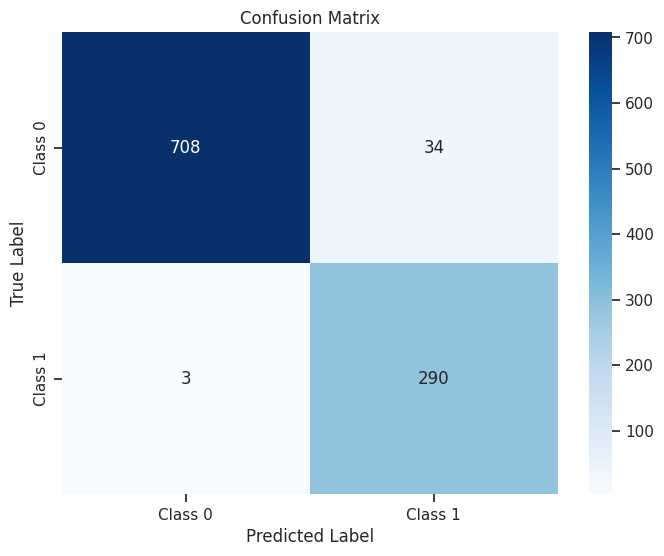

In [78]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [79]:
# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       742
           1       0.90      0.99      0.94       293

    accuracy                           0.96      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.96      0.96      1035



# Save Model SVM

In [80]:
# Simpan model SVM
dump(model, filename='/kaggle/working/model_SVM.joblib')

['/kaggle/working/model_SVM.joblib']

# Deplyoment

In [81]:
model = load('/kaggle/working/model_SVM.joblib')
vocab = pickle.load(open('/kaggle/working/kbest_feature.pickle', 'rb'))

# Testing

In [83]:
# Terima input teks dari pengguna
input_text = input("Masukkan teks email yang ingin diprediksi: ")

# Lakukan text pre-processing pada input teks
pre_input_text = preprocess_text(input_text)

# Definisikan TF-IDF Vectorizer dengan menggunakan vocabulary yang telah ditentukan
tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))

# Ubah hasil TF-IDF dari sparse matrix ke dense array
tf_idf_transformed = tf_idf_vec.fit_transform([pre_input_text]).toarray()

# Lakukan prediksi dengan model yang sudah dilatih
result = model.predict(tf_idf_transformed)

# Tampilkan hasil pre-processing
print('Hasil Text Preprocessing :', pre_input_text)

# Modifikasi hasil prediksi untuk menampilkan "Ham" atau "Spam"
if result == 0:
    email = 'Email Ham (Normal)'
elif result == 1:
    email = 'Email Spam'
else:
    email = 'Unknow Category'

# Tampilkan hasil prediksi
print('Hasil prediksi', input_text, 'adalah', email)


Masukkan teks email yang ingin diprediksi:  NICE TO KNOW YOU


Hasil Text Preprocessing : nice to know you
Hasil prediksi NICE TO KNOW YOU adalah Email Ham (Normal)


In [84]:
# Simpan hasil ke file
with open('hasil_prediksi.txt', 'w') as file:
    file.write(f'Teks Email: {input_text}\n')
    file.write(f'Teks setelah preprocessing: {pre_input_text}\n')
    file.write(f'Hasil prediksi: {email}\n')